In [1]:
# import library
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
# import dataset
dataset = 'amazon_alexa.csv'
df = pd.read_csv(dataset)
df = df.loc[:, ::-1]
data = df.rename(columns={' rating':'rate'})
data.head()

,feedback,verified_reviews,variation,date,rate
0,1,Love my Echo!,Charcoal Fabric,31-Jul-18,5
1,1,Loved it!,Charcoal Fabric,31-Jul-18,5
2,1,"Sometimes while playing a game, you can answer...",Walnut Finish,31-Jul-18,4
3,1,I have had a lot of fun with this thing. My 4 ...,Charcoal Fabric,31-Jul-18,5
4,1,Music,Charcoal Fabric,31-Jul-18,5


In [3]:
# lihat jumlah baris dan kolom
data.shape

(3150, 5)

In [4]:
# mengambil 1500 data
data = data.iloc[0:1500]
# mengambil data hanya verified_reviews dan rating
data = data[['verified_reviews', 'rate']]
# hapus data kosong
data.dropna(inplace=True)

data

,verified_reviews,rate
0,Love my Echo!,5
1,Loved it!,5
2,"Sometimes while playing a game, you can answer...",4
3,I have had a lot of fun with this thing. My 4 ...,5
4,Music,5
...,...,...
1495,Love it! Great to request music and be able t...,5
1496,What we liked most was actually seeing the wor...,4
1497,"I’m just learning about this product, but what...",5
1498,Easy to use!,5


In [5]:
# lihat index dan tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   verified_reviews  1500 non-null   object
 1   rate              1500 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.6+ KB


In [6]:
# mendeteksi keberadaan nilai kosong
data.isna().values.any()

False

In [7]:
# tampilkan hanya baris duplikasi sekunder
data[data.duplicated()]
# hitung jumlah duplikasi data
data.duplicated().value_counts()

False    1106
True      394
dtype: int64

In [8]:
# menghapus duplikasi data
data.drop_duplicates(inplace=True)
data.shape

(1106, 2)

In [9]:
# lemmatization dan stemming data
lemma = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def ScanReview(text):
    # ubah ke lower case
    text = text.lower()
    # hapus teks tidak relevan
    text = re.sub('[^a-zA-Z]','  ', text)
    # tokenize
    text = word_tokenize(text)
    # hapus stop words
    text = [item for item in text if item not in stop_words]
    # lemmatization
    text = [lemma.lemmatize(word=w,pos='v') for w in text]
    # hapus kata yang kurang dari dua huruf/karakter
    text = [i for i in text if len(i) > 2]                          
    # penggabungan setiap token menjadi kalimat utuh
    text = ' '.join(text)                                            
    return text

data['ScanReview'] = data['verified_reviews'].apply(ScanReview)
data['ScanReview'].head()

0                                            love echo
1                                                 love
2    sometimes play game answer question correctly ...
3    lot fun thing old learn dinosaurs control ligh...
4                                                music
Name: ScanReview, dtype: object

In [10]:
# pelabelan data
label = []
for index, row in data.iterrows():
    if row["rate"] == 5 or row["rate"] == 4:
        label.append('positif')
    else:
        label.append('negatif')

data["Label"] = label

data.head()

,verified_reviews,rate,ScanReview,Label
0,Love my Echo!,5,love echo,positif
1,Loved it!,5,love,positif
2,"Sometimes while playing a game, you can answer...",4,sometimes play game answer question correctly ...,positif
3,I have had a lot of fun with this thing. My 4 ...,5,lot fun thing old learn dinosaurs control ligh...,positif
4,Music,5,music,positif


In [11]:
# hitung jumlah data dari masing-masing label
data["Label"].value_counts()

positif    950
negatif    156
Name: Label, dtype: int64

In [12]:
# import library untuk menghitung kata dengan tf-idf
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [13]:
# import data hasil lemmatization dan stemming, cek data kosong
Review = data['ScanReview']
Review.isnull().sum()

0

In [14]:
# hitung jumlah kata
cv = CountVectorizer()
term_fit = cv.fit(Review)

print (len(term_fit.vocabulary_))

2107


In [15]:
# urutkan berdasarkan abjad
term_fit.vocabulary_

{'love': 1099,
 'echo': 580,
 'sometimes': 1713,
 'play': 1373,
 'game': 765,
 'answer': 91,
 'question': 1465,
 'correctly': 413,
 'alexa': 58,
 'say': 1602,
 'get': 780,
 'wrong': 2087,
 'like': 1068,
 'able': 3,
 'turn': 1938,
 'light': 1065,
 'away': 157,
 'home': 876,
 'lot': 1095,
 'fun': 753,
 'thing': 1865,
 'old': 1264,
 'learn': 1054,
 'dinosaurs': 525,
 'control': 397,
 'categories': 291,
 'nice': 1224,
 'sound': 1729,
 'music': 1197,
 'well': 2044,
 'receive': 1498,
 'gift': 782,
 'need': 1212,
 'another': 90,
 'bluetooth': 224,
 'something': 1711,
 'easily': 576,
 'accessible': 10,
 'find': 709,
 'smart': 1696,
 'speaker': 1739,
 'wait': 2015,
 'see': 1621,
 'else': 601,
 'without': 2066,
 'cellphone': 297,
 'use': 1982,
 'many': 1124,
 'feature': 699,
 'ipad': 986,
 'great': 814,
 'alarm': 54,
 'almost': 64,
 'deaf': 463,
 'hear': 853,
 'bedroom': 189,
 'live': 1080,
 'room': 1578,
 'reason': 1493,
 'enough': 616,
 'keep': 1011,
 'ask': 128,
 'random': 1477,
 'response': 

In [16]:
# operasikan tf-idf
# kolom pertama jumlah dokumen
# kolom kedua letak katanya
# kolom ketiga hasil dari tf-idf

term_frequency_all = term_fit.transform(Review)
print (term_frequency_all)

  (0, 580)	1
  (0, 1099)	1
  (1, 1099)	1
  (2, 3)	1
  (2, 58)	1
  (2, 91)	2
  (2, 157)	1
  (2, 413)	1
  (2, 765)	1
  (2, 780)	1
  (2, 876)	1
  (2, 1065)	1
  (2, 1068)	1
  (2, 1373)	1
  (2, 1465)	1
  (2, 1602)	1
  (2, 1713)	1
  (2, 1938)	1
  (2, 2087)	1
  (3, 291)	1
  (3, 397)	1
  (3, 525)	1
  (3, 753)	1
  (3, 765)	1
  (3, 1054)	1
  :	:
  (1101, 1099)	1
  (1101, 1104)	1
  (1101, 1194)	1
  (1101, 1197)	1
  (1101, 1552)	1
  (1101, 1621)	1
  (1102, 26)	1
  (1102, 153)	1
  (1102, 440)	1
  (1102, 660)	1
  (1102, 827)	1
  (1102, 1056)	1
  (1102, 1068)	1
  (1102, 1079)	1
  (1102, 1621)	1
  (1102, 1716)	1
  (1102, 2072)	1
  (1102, 2084)	1
  (1103, 1023)	1
  (1103, 1054)	1
  (1103, 1099)	1
  (1103, 1435)	1
  (1104, 578)	1
  (1104, 1982)	1
  (1105, 1212)	1


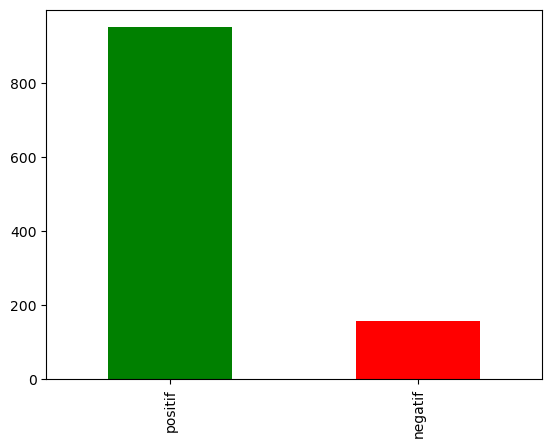

In [17]:
# menampilkan bar chart dari data label
sentimen_data = pd.value_counts(data["Label"], sort= True)
sentimen_data.plot(kind = 'bar', color = ["green", "red"])
plt.show()

In [18]:
# import wordcloud
from wordcloud import WordCloud

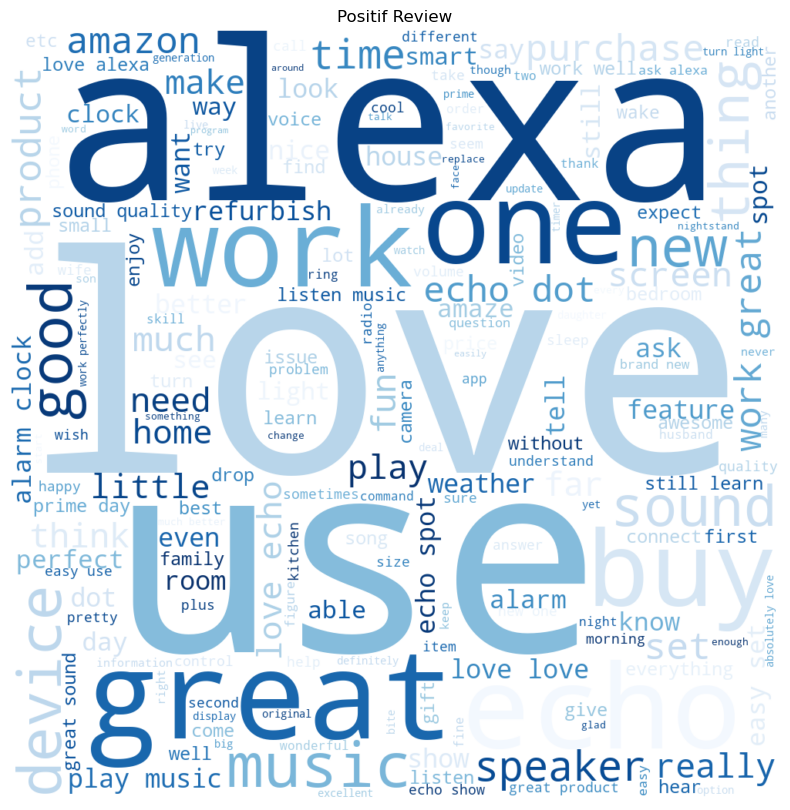

In [19]:
# wordcloud positif review
train_1 = data[data["Label"] == 'positif']

all_text_1 = ' '.join(word for word in train_1["ScanReview"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positif Review")
plt.margins(x=0, y=0)
plt.show()

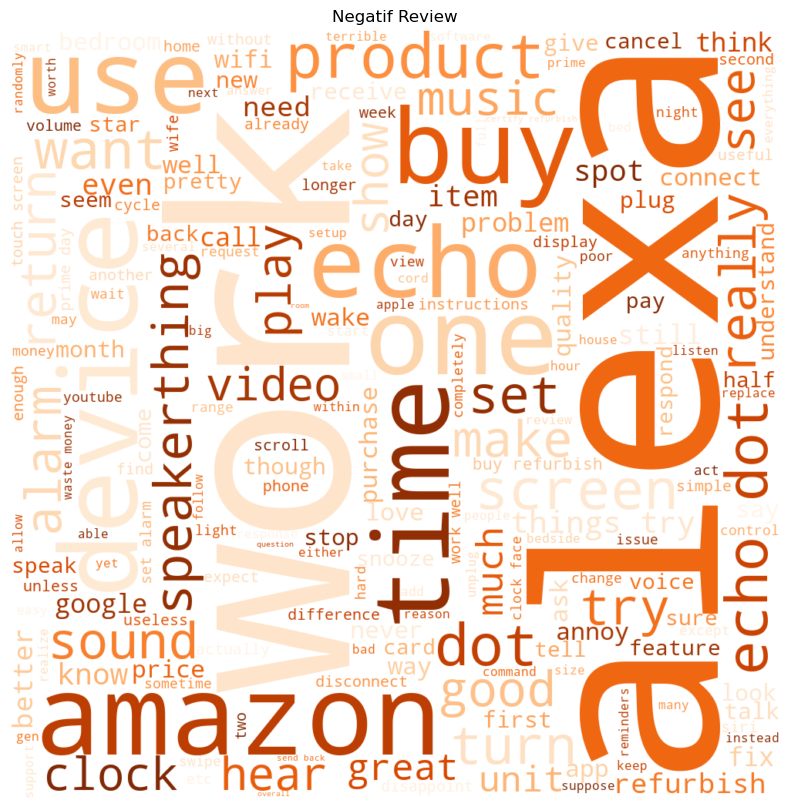

In [20]:
# wordcloud negatif review
train_0 = data[data["Label"] == 'negatif']

all_text_0 = ' '.join(word for word in train_0["ScanReview"])
wordcloud = WordCloud(colormap='Oranges', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negatif Review")
plt.margins(x=0, y=0)
plt.show()

In [21]:
# siapkan data training dan testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# split x dan y
x = data['ScanReview']
y = data['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
# panggil count vectorizer
vc = CountVectorizer()
vc.fit(x_train)

x_train = vc.fit_transform(x_train)
x_test = vc.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(884, 1889)
(222, 1889)


In [23]:
x_train = x_train.toarray()

In [24]:
x_test = x_test.toarray()

In [25]:
# import model naive bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [26]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
# tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

# Fitting ke Model
gscv_nb.fit(x_train,y_train)
# mendapatkan hyperparameters terbaik
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.02848035868435802}

In [27]:
nb = GaussianNB(var_smoothing=1.0)

In [28]:
nb.fit(x_train, y_train)

GaussianNB(var_smoothing=1.0)

In [29]:
# klasifikasi prediksi naive bayes
y_pred_nb = nb.predict(x_test)

In [30]:
# tampilkan hasil klasifikasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_nb))
print(' ')
print('Classification Report')
print(classification_report(y_test, y_pred_nb))

Confusion Matrix
[[  1  24]
 [  1 196]]
 
Classification Report
              precision    recall  f1-score   support

     negatif       0.50      0.04      0.07        25
     positif       0.89      0.99      0.94       197

    accuracy                           0.89       222
   macro avg       0.70      0.52      0.51       222
weighted avg       0.85      0.89      0.84       222



In [31]:
# klasifikasi random forest
from sklearn.ensemble import RandomForestClassifier

# model_rf = RandomForestClassifier()
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train,y_train)
pred_rf = model_rf.predict(x_test)

models = [model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

#tampilkan hasil klasifikasi random forest
print(accuracy_scores)

[0.9099099099099099]


Kesimpulan analisis sentimen terhadap polling data dari ulasan pelanggan Amazon mengenai berbagai produk amazon Alexa.
Untuk tahapan text preprocessing digunakan lemmatization dan stemming dari nltk, sementara untuk pembobotan menggunakan tf-idf.
Analisis sentimen di sini menggunakan 2 metode klasifikasi sebagai berikut.
1.naive bayes didapatkan akurasi 89%
2.random forest didapatkan akurasi 90%
Selain itu juga dilakukan visualisasi kata-kata positif dan negatif menggunakan word cloud.